In [1]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter=" ",
                   header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [2]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


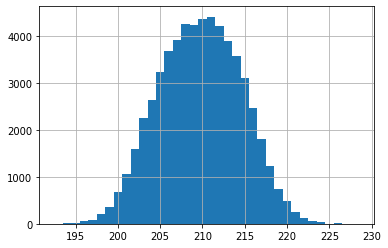

In [3]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align="left")
plt.show()

In [4]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


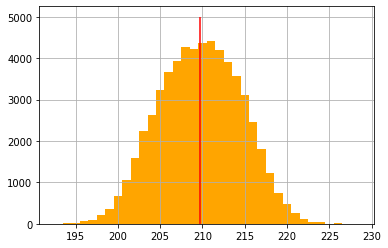

In [5]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), color="orange", align="left")
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [6]:
#定義からの計算
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))#標本分散
unbiased_var = sum(diff_square)/(len(zs)-1)#不変分散

print(sampling_var)
print(unbiased_var)

#Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=0)#標本分散
pandas_default_var = data["lidar"].var()#デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)


#Numpyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])#デフォルト(標本分散）
numpy_unbiased_var = np.var(data["lidar"],ddof=1)#不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441


In [7]:
import math

#定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

#Pandasを使用
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292072


In [8]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()#横向きに出力

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [9]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [10]:
sum(freqs["probs"])

1.0

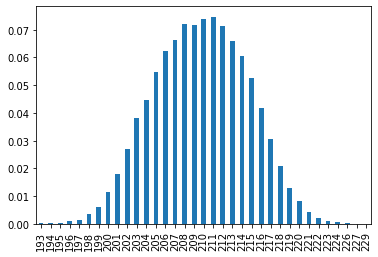

In [11]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [12]:
def drawing():#ややこしいので関数化
    return freqs.sample(n=1, weights="probs").index[0]

drawing()#実行

208

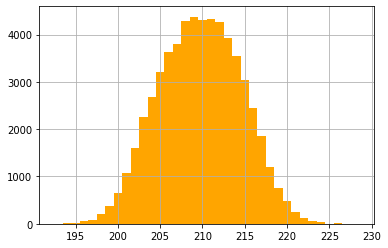

In [13]:
samples = [drawing() for i in range(len(data))]#len(data)=58988なので結構時間かかった。
#samples = [drawing() for i in range(1000)]
simulated = pd.DataFrame(samples,columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p), color="orange",align="left")
plt.show()

In [14]:
def p(z, mu=209.7,dev=23.4):
    return math.exp(-(z-mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

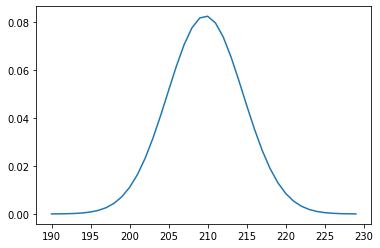

In [15]:
zs = range(190,230)
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

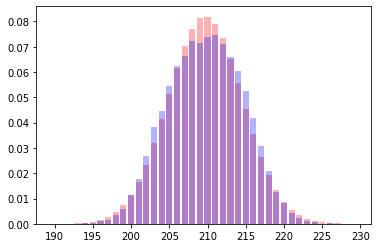

In [16]:
def prob(z,width=0.5):
    return width*( p(z-width) + p(z+width))#（上底+下底）*高さ÷2

zs = range(190, 230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys,color="red", alpha=0.3)#alphaでグラフを透明化
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color = "blue", alpha=0.3)
plt.show()

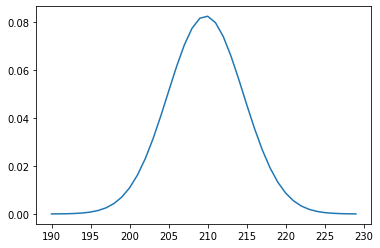

In [18]:
from scipy.stats import norm

zs = range(190,230)
ys = [norm.pdf(z,mean1,stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

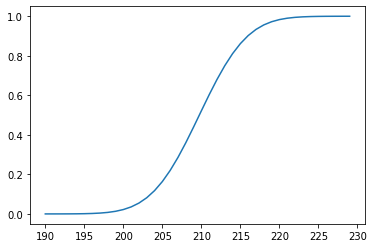

In [20]:
zs = range(190,230)
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

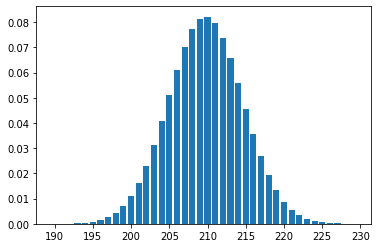

In [25]:
zs = range(190,230)
ys = [norm.cdf(z+0.5,mean1,stddev1) - norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs,ys)
plt.show()

In [47]:
import random

samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples)/len(samples)

3.5104